
# Import Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
def generate_auc_roc_curve(clf, X_test, Y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

# Import Datasets

In [4]:
train_data = pd.read_csv(r"Training Data.csv")
test_data = pd.read_csv(r"Test Data.csv")
train_data = train_data.drop(["Id"],axis=1)
test_data = test_data.drop(["id"],axis=1)

# Check how train dataset looks like.

In [5]:
train_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
train_data.shape

(252000, 12)

In [7]:
test_data.head()


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [8]:
test_data.shape

(28000, 11)

# Convert datatype of selected fields.

In [9]:
# train_data["profession"]=pd.factorize(train_data.profession)[0]
train_data= pd.get_dummies(train_data,columns=["profession","city","state","house_ownership"])
# train_data["state"]=pd.factorize(train_data.state)[0]
train_data["married"]=pd.factorize(train_data.married)[0]
# train_data["house_ownership"]=pd.factorize(train_data.house_ownership)[0]
train_data["car_ownership"]=pd.factorize(train_data.car_ownership)[0]

# test_data["profession"]=pd.factorize(test_data.profession)[0]
# test_data["city"]=pd.factorize(test_data.city)[0]
# test_data["state"]=pd.factorize(test_data.state)[0]
test_data= pd.get_dummies(test_data,columns=["profession","city","state","house_ownership"])

test_data["married"]=pd.factorize(test_data.married)[0]
# test_data["house_ownership"]=pd.factorize(test_data.house_ownership)[0]
test_data["car_ownership"]=pd.factorize(test_data.car_ownership)[0]


# Drop the dependent variable from the train dataset and Making train and validation split. 

In [10]:
X = train_data.drop("risk_flag",axis=1)
y = train_data["risk_flag"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
print(np.sum(y == 0),np.sum(y==1))

221004 30996


# Training Decision Tree classifier. Suffers from variance

In [13]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
y_pred= DTClassifier.predict(X_val)
generate_model_report(y_val, y_pred)

Accuracy =  0.88510101010101
Precision =  0.5272286125089863
Recall =  0.577403798838697
F1 Score =  0.5511766640048852


0.8528733136849334


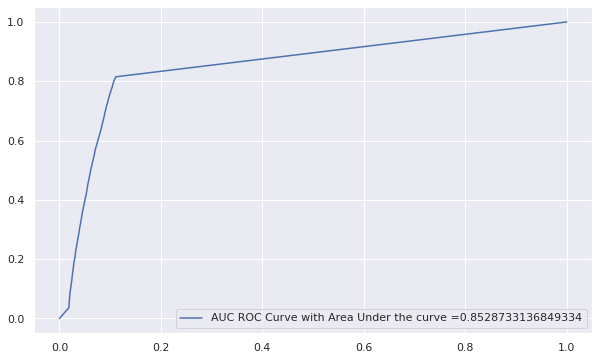

In [15]:
print(roc_auc_score(y_val, DTClassifier.predict_proba(X_val)[:, 1]))
generate_auc_roc_curve(DTClassifier, X_val, y_val)


# Training Logistic Regression Classifier. Poor ROC AUC score.

Accuracy =  0.8778138528138528
Precision =  0.0
Recall =  0.0
F1 Score =  0.0


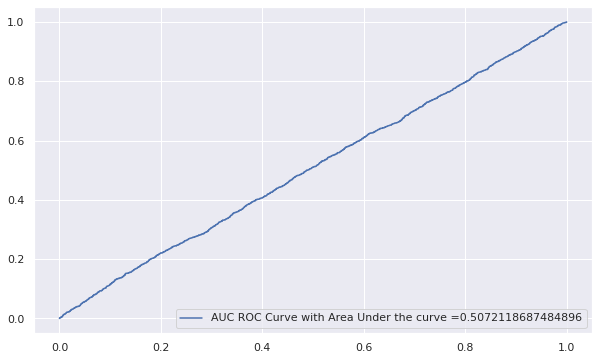

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)

In [18]:
np.unique(y_val)

array([0, 1])

# Training Random Forest Classifier.

Accuracy =  0.8986411736411737
Precision =  0.6080878681977034
Recall =  0.4794803661056983
F1 Score =  0.5361800473229517


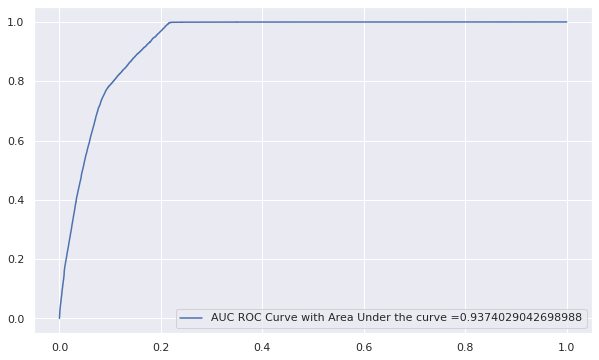

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)

# Ensemble methods. 

## 1-  Bagging Classifier

Accuracy =  0.8977152477152477
Precision =  0.5867673272517563
Recall =  0.5507331955516189
F1 Score =  0.5681795106102142


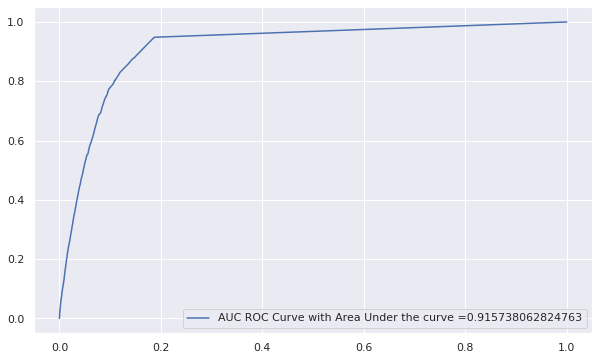

In [22]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# define model
clf = BaggingClassifier(n_jobs = -1).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)



# For Cross validation report
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

## 2 - Random Forest with banlanced class

Accuracy =  0.8955266955266955
Precision =  0.5519943522767384
Recall =  0.7695108749138865
F1 Score =  0.6428512702458276


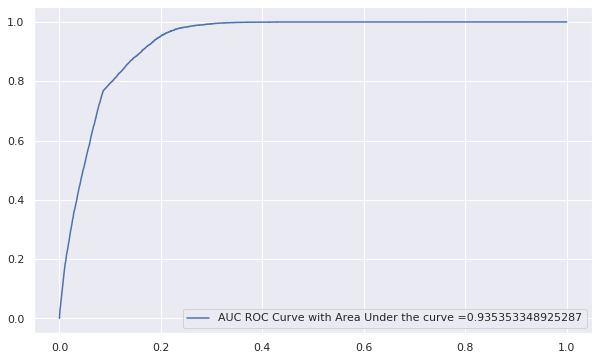

In [25]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=100,class_weight='balanced', n_jobs = -1).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)

# # define evaluation procedure i.e. cross validation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

## 3 - Random forest from imbalance learn library

Accuracy =  0.8855699855699856
Precision =  0.5207355494116891
Recall =  0.7970672177935243
F1 Score =  0.6299292214357937


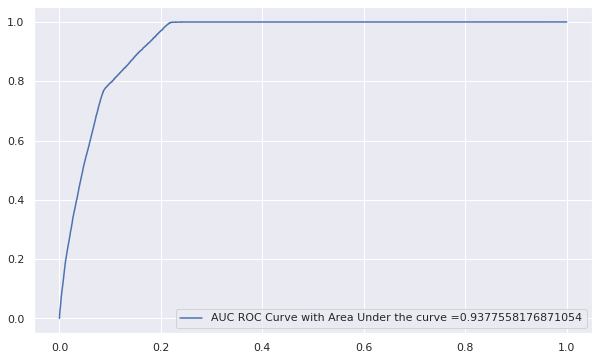

In [26]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier


clf = BalancedRandomForestClassifier(n_estimators=500,max_depth=100, n_jobs = -1).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)


# model1 = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',random_state=0)


# model1 = EasyEnsembleClassifier(n_estimators=200,random_state=0,n_jobs = -1)
# define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=500, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))


## 4 - RUSBoost Classifier

Accuracy =  0.8728715728715729
Precision =  0.38564273789649417
Recall =  0.06820194862710363
F1 Score =  0.1159056698444556


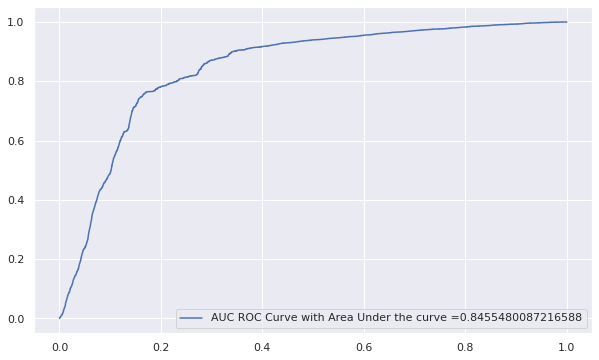

In [40]:
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier(n_estimators=17,
                         base_estimator=DecisionTreeClassifier(max_depth = 100),
                         random_state=0
                        ).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)



## 5 - Easy Ensemble

Accuracy =  0.8691798941798942
Precision =  0.4799530935894572
Recall =  0.845881310894597
F1 Score =  0.6124193950621681


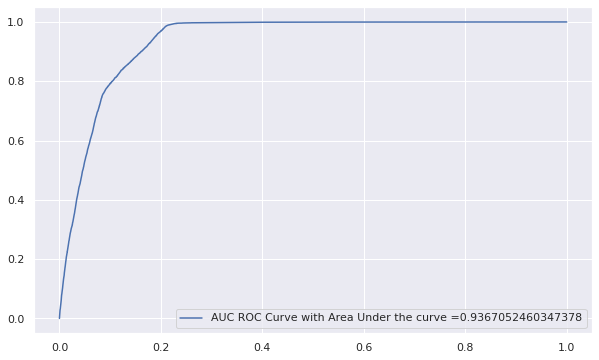

In [37]:
from imblearn.ensemble import EasyEnsembleClassifier
clf = EasyEnsembleClassifier(n_estimators=17,
                             random_state=0,
                             n_jobs = -1,
                             base_estimator=DecisionTreeClassifier(max_depth = 100)
                            ).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)

## 6 - Adaboost

Accuracy =  0.8921837421837422
Precision =  0.5570079190916897
Recall =  0.5745497490404488
F1 Score =  0.5656428640635597


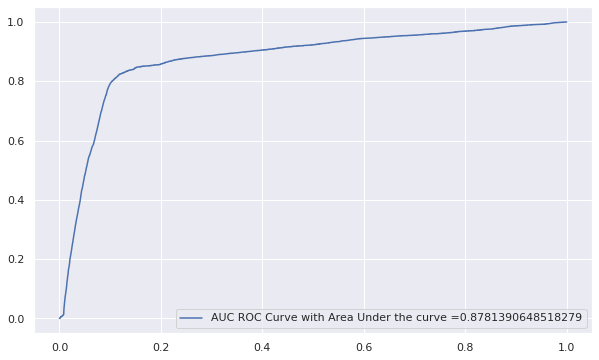

In [42]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=17,
                         random_state=0,
                         base_estimator=DecisionTreeClassifier(max_depth = 100)
                        ).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)


## 6 - Gradient Boosting trees

Accuracy =  0.8869047619047619
Precision =  0.5403587443946188
Recall =  0.4980808975494538
F1 Score =  0.5183591949608235


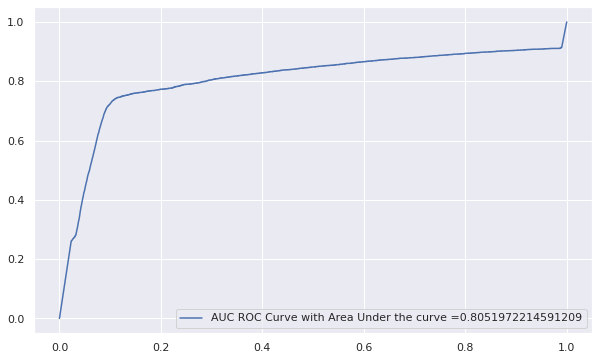

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=17, learning_rate=1.0, max_depth=100, random_state=0).fit(X_train, y_train)
generate_model_report(y_val, clf.predict(X_val))
generate_auc_roc_curve(clf, X_val, y_val)


## 7 - Xgboost

[22:40:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.7852813852813852
Precision =  0.33583649784528735
Recall =  0.7746284814486764
F1 Score =  0.4685397940353593


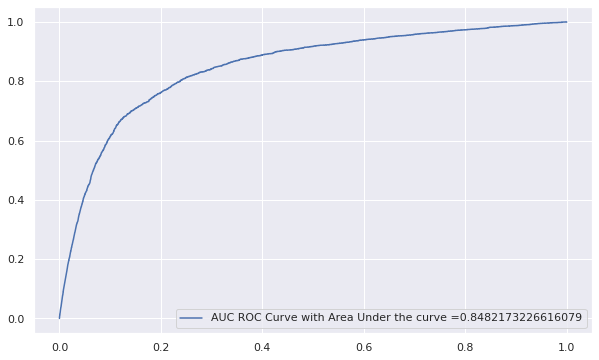

In [45]:
import xgboost
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=117, n_jobs=-1, scale_pos_weight = 7.13).fit(X_train.values, y_train.values, verbose=5)
generate_model_report(y_val.values, clf.predict(X_val.values))
generate_auc_roc_curve(clf, X_val.values, y_val.values)


 ## 8 - cat-boost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8745626	test: 0.8870930	best: 0.8870930 (0)	total: 22.6ms	remaining: 23s
10:	learn: 0.9068597	test: 0.9176514	best: 0.9176514 (10)	total: 232ms	remaining: 21.3s
20:	learn: 0.9117649	test: 0.9220673	best: 0.9220866 (19)	total: 427ms	remaining: 20.3s
30:	learn: 0.9151590	test: 0.9248048	best: 0.9248048 (30)	total: 612ms	remaining: 19.5s
40:	learn: 0.9181093	test: 0.9269980	best: 0.9269980 (40)	total: 798ms	remaining: 19s
50:	learn: 0.9205055	test: 0.9285173	best: 0.9285173 (50)	total: 989ms	remaining: 18.7s
60:	learn: 0.9211895	test: 0.9286210	best: 0.9286738 (54)	total: 1.17s	remaining: 18.4s
70:	learn: 0.9240683	test: 0.9310559	best: 0.9310559 (70)	total: 1.35s	remaining: 18.1s
80:	learn: 0.9248320	test: 0.9313424	best: 0.9313424 (80)	total: 1.54s	remaining: 17.8s
90:	learn: 0.9254912	test: 0.9315308	best: 0.9315308 (90)	total: 1.72s	remaining: 17.5s
100:	learn: 0.9258535	test: 0.9315343	best: 0.9315416 (99)	total: 1.9s	remaining: 17.2s
110:	learn: 0.9262042	test: 0.9314775

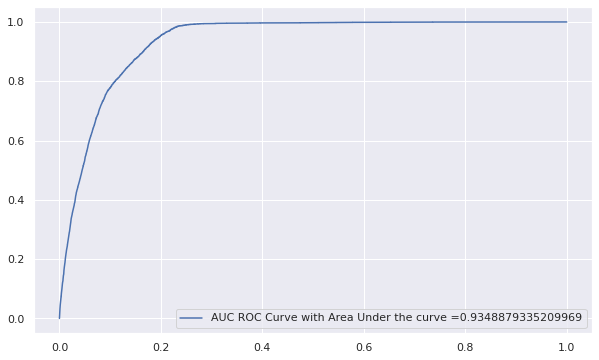

In [60]:
#preparing dataset 
train_data = pd.read_csv(r"Training Data.csv")
test_data = pd.read_csv(r"Test Data.csv")
train_data = train_data.drop(["Id"],axis=1)
test_data = test_data.drop(["id"],axis=1)

X = train_data.drop("risk_flag",axis=1)
y = train_data["risk_flag"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Defining category feature columns
cat_features = np.where(X.dtypes == object)[0]

#Creating pool of dataset as dataset is unbalanced
from catboost import Pool
train_pool = Pool(
    data = X_train,
    label = y_train,
    cat_features = cat_features
)

test_pool = Pool(
    data = X_test,
    label = y_test,
    cat_features = cat_features
)




from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=1017,
    learning_rate=0.5,
    task_type='GPU',
    custom_loss=["AUC", "Accuracy"],
    early_stopping_rounds= 71,
    eval_metric="AUC"
  ).fit(train_pool, eval_set = test_pool, verbose = 10, plot = True)

generate_model_report(y_test, clf.predict(X_test))
generate_auc_roc_curve(clf, X_test, y_test)

# Saving test dataset predictions in sample.csv file

In [34]:
# Train your favorite classifier with optimal hyperparameters for whole data 
y_pred= clf.predict(test_data)
id_ = np.linspace(1,len(y_pred),len(y_pred), dtype = np.int)
pd.DataFrame({"id":id_,"risk_flag":y_pred}).to_csv("sample.csv",index=False)
